# Imports

In [38]:
from qiskit import QuantumCircuit,ClassicalRegister, QuantumRegister
from qiskit import Aer,execute
from qiskit.visualization import plot_histogram

# Functions

In [79]:
#Constant Function
def constOracle(qubits,value):
    qc=QuantumCircuit(qubits,name='oracle')
    if not isinstance(value, int):
         raise ValueError('Value should be a integer for const function')
    if value==1:
        qc.x(qubits-1)
    qc_inst = qc.to_instruction()
    qc = QuantumCircuit(qubits)
    qc.append(qc_inst,list(range(qubits)))
    return qc

In [71]:
#Implements Balanced oracle
def balancedOracle(qubits,value):
    qc=QuantumCircuit(qubits,name='oracle')
    for i in range(qubits-1):
        if value[i]==1:
            qc.x(i)
    qc.barrier()
    for i in range(qubits-1):
        qc.cx(i,qubits-1)
    qc.barrier()
    for i in range(qubits-1):
        if value[i]==1:
            qc.x(i)
    qc_inst = qc.to_instruction()
    qc = QuantumCircuit(qubits)
    qc.append(qc_inst,list(range(qubits)))
    return qc

In [74]:
def DJA(num_qubits,fntype='const',value='0'):
    if num_qubits<=1:
        raise ValueError("num_qubits should be greater than 1")
    #QuantumRegisters
    qr=QuantumRegister(num_qubits,'x')
    qr1=QuantumRegister(1,'function')
    #ClassicalRegisters
    cr=ClassicalRegister(num_qubits,'m')
    #QuantumCircuit constucted
    qc=QuantumCircuit(qr,qr1,cr)
    #HadamardGate for every qubit
    qc.x(num_qubits)
    for i in range(num_qubits+1):
        qc.h(i)
    qc.barrier()
    if fntype=='const':
        qc.compose(constOracle(num_qubits+1,value),list(range(num_qubits+1)), inplace=True)
    else:
        qc.compose(balancedOracle(num_qubits+1,value),list(range(num_qubits+1)), inplace=True)
    qc.barrier()
    for i in range(num_qubits):
        qc.h(i) 
    for i in range(num_qubits):
        qc.measure(i,i)
    qc.draw('mpl')
    
    return qc

# Example

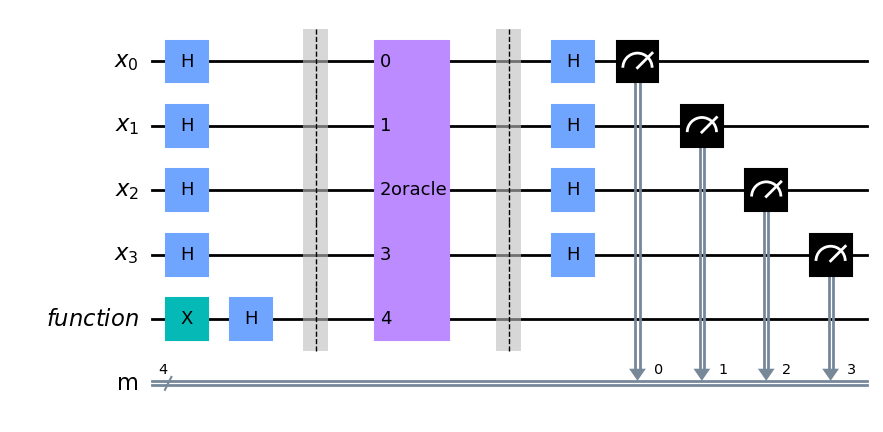

In [84]:
# First parameter: Give the number of qubits.
# Second parameter: Define the type of function. Use the 'const' string argument for a constant function.
# Third parameter: If 'const' is used as the second argument, this should be an integer. If it is equal to 1, a constant function whose output is 1 is considered. Otherwise, a constant 0 function is considered.
# If any other string argument is used for the second parameter, it implies a balanced function.
# In this case, the third argument should be a list. The 'x' operator will be applied to the qubits corresponding to the value 1 in the provided list.

qc=DJA(4,'const',1)
qc=DJA(4,'balanced',[1,1,0,0])
qc.draw('mpl')

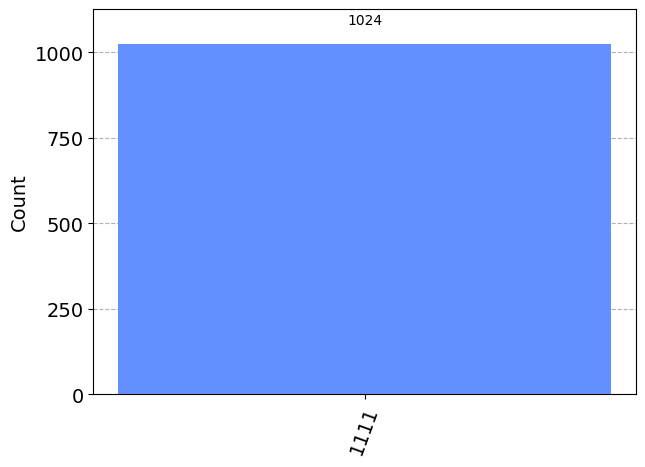

In [85]:
results=execute(qc,Aer.get_backend('qasm_simulator')).result()
answer = results.get_counts()
plot_histogram(answer)